In [1110]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

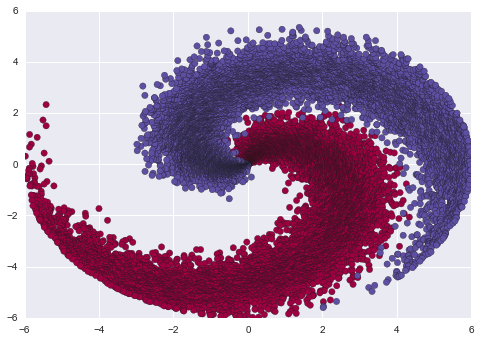

In [1111]:
width=6
n = 10000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((n*K,D)) # data matrix (each row = single example)
y = np.zeros(n*K, dtype='uint8') # class labels
for j in xrange(K):
    ix = range(n*j,n*(j+1))
    r = 6*np.linspace(0.0,1,n) # radius
    t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.39 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1*width,width])
plt.ylim([-1*width,width])

x_train = X
y_train = y



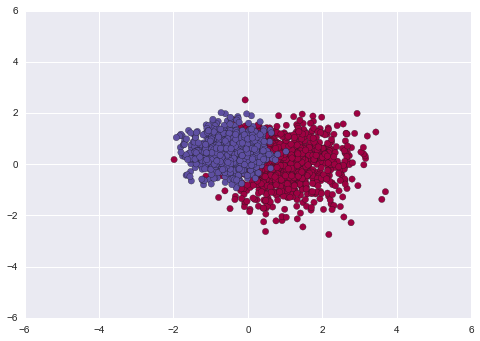

In [1112]:
width=6
n = 1000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((n*K,D)) # data matrix (each row = single example)
y = np.zeros(n*K, dtype='uint8') # class labels


X1 = (0.8)*np.random.randn(n,D)+np.array([1,0])
X2 = (0.5)*np.random.randn(n,D)+np.array([-0.5,.5])
X = np.vstack((X1, X2))
y = np.hstack((np.zeros(n), np.ones(n)))
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1*width,width])
plt.ylim([-1*width,width])

x_train = X
y_train = y

In [1113]:
y.shape

(2000L,)

In [1114]:
ones = np.ravel(np.ones(2*n))
ones = ones.reshape((2*n,1))
x_train = np.hstack((ones, x_train))


In [1115]:
#from IPython.external import mathjax; mathjax.install_mathjax()

Data: $(x_1^1, x_2^1, \ldots, x_d^1, y^1), \ldots, (x_1^n, x_2^n, \ldots, x_d^n, y^n)$

Model:
    
$$P(Y=1 | \mathbf{x} ; \mathbf{w}) = \frac{e^{\sum_{i=1}^d w_i x_i}}{1 + e^{\sum_{i=1}^d w_i x_i}}$$
    
$$P(Y=0 | \mathbf{x} ; \mathbf{w}) = 1-\frac{e^{\sum_{i=1}^d w_i x_i}}{1 + e^{\sum_{i=1}^d w_i x_i}} = \frac{1}{1 + e^{\sum_{i=1}^d w_i x_i}}$$

Let $p_j = P(Y=1 | \mathbf{x}^j ; \mathbf{w})$. The likelihood function is:

$$
l(\mathbf{w})
= \log \prod_j p_j 
= \sum_j \log p_j 
= \sum_{j: \; y^j=1} \log p_j + \sum_{j: \; y^j=0} \log (1-p_j) 
$$

We have

$$\frac{d}{dw_i} \log p_j = \frac{1}{p_j} \frac{d}{dw_i} p_j = \frac{1}{p_i} p_i (1-p_i)x_i^j = (1-p_i)x_i^j$$

and

$$\frac{d}{dw_i} \log (1-p_i) = \frac{1}{1-p_i} \frac{d}{dw_i} (1-p_i)x_i^j = -p_ix_i^j$$

Therefore,

\begin{align*}
\frac{d}{dw_i} l(\mathbf{w}) 
&= \sum_{j: \; y^j=1} \frac{d}{dw_i} \log p_j + \sum_{j: \; y^j=0} \frac{d}{dw_i} \log (1-p_j) \\
&= \sum_{j: \; y^j=1} (1-p_i)x_i^j+ \sum_{j: \; y^j=0} -p_ix_i^j \\
&= \sum_{j} (y^j-p_i)x_i^j
\end{align*}

In [1116]:
#w,x are vectors
def P(w, x):
    return 1.0/(1+np.exp(-np.sum(x*w, axis=1)))

$cost = \prod_j P(Y=y^j | \mathbf{x}^j; x) = \prod_{y^j=1} P(Y=1 | \mathbf{x}^j; x)  \prod_{y^=0} P(Y=0 | \mathbf{x}^j; x)  $

$= \prod_{j} P(Y=1 | \mathbf{x}^j; x)^{y^j} P(Y=0 | \mathbf{x}^j; x)^{1-y^j} $


$\log cost = \sum_j \log P(Y=1 | \mathbf{x}^j; x)^{y^j}  + \log P(Y=0 | \mathbf{x}^j; x)^{1-y^j}$

$= \sum_j y^j\log P(Y=1 | \mathbf{x}^j; x)  + (1-y^j)\log P(Y=0 | \mathbf{x}^j; x)$

$= \sum_j y^j\log p_j  + (1-y^j)\log (1-p_j)$

In [1117]:
def calc_current_cost(x_train, y_train, w):
    ps = P(w, x_train)
    #print ps
    #print np.log(1-ps)
    return np.sum(y_train*np.log(ps) + (1-y_train)*np.log(1-ps))
    
    

#Gradient Descent

In [1118]:
def calc_grad(x_train, y_train, w, i):
    return np.sum( (y_train-p(w, x_train))*x_train[:,i])  

In [1119]:
iters=100000
alpha=0.1

In [1120]:
def gradient_ascent(w, x_train, y_train, grad, alpha):
    d = x_train.shape[1]
    costs = []
    for c in range(iters):
        temp_w = np.zeros(len(w))
        for i in range(d):
            temp_w[i] = w[i] + alpha*grad(x_train, y_train, w, i)
        w = temp_w
        if c<10000:
            costs.append(calc_current_cost(x_train, y_train, w))
    return w, costs

In [1121]:
d = x_train.shape[1]

w, costs = gradient_ascent(np.random.randn(d), x_train, y_train, calc_grad, alpha)


In [1122]:
w

array([ -0.76484162, -19.34508161,   5.75500905])

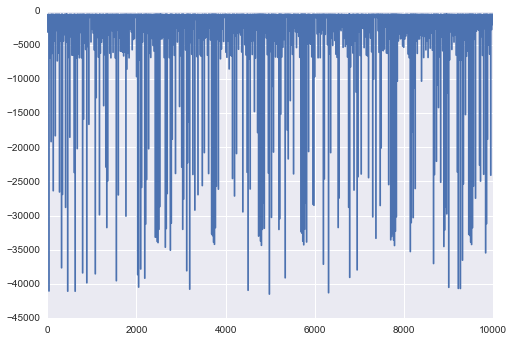

In [1124]:
plt.plot(costs)

#SGD

In [1125]:
def SGD(x_train, y_train, w, alpha):
    costs = []
    
    for c in xrange(iters):
        ind = np.random.randint(len(x_train))
        x = x_train[ind, :]
        y = y_train[ind]
        p = 1.0/(1+np.exp(-np.sum(x*w)))
        w = w + alpha*(y-p)*x
        if c%10000==0:
            costs.append(calc_current_cost(x_train, y_train, w))
            alpha=alpha/2.0
            
    return w, costs

In [1126]:
d = x_train.shape[1]
w_SGD, costs_SGD = SGD(x_train, y_train, np.zeros(d), alpha)

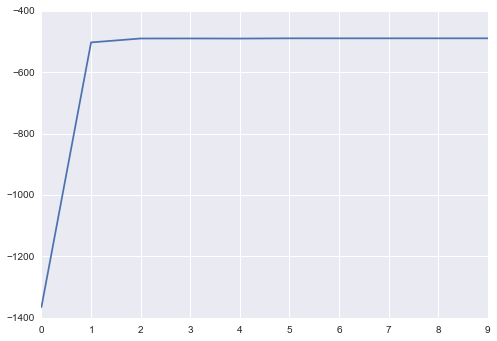

In [1127]:
plt.plot(costs_SGD)

#Test data

In [1128]:
N=2*n
x_test = np.array([0,0,0])
for x in np.linspace(-1*width, width, 200):
    for y in np.linspace(-1*width, width, 200):
        x_test = np.vstack((x_test, np.array([1,x,y])))
        
x_test = np.delete(x_test, (0), axis=0)

In [1129]:
ps = P(w, x_test)
print ps

ps[ps>0.5]=1
ps[ps<=0.5]=0


[  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   8.99168250e-37
   1.27220372e-36   1.79999940e-36]


In [1130]:
y_train_SGD = P(w_SGD, x_test)

y_train_SGD[y_train_SGD>0.5]=1
y_train_SGD[y_train_SGD<=0.5]=0


In [1131]:
def plotIt(x_train, y_train, x_test, y_test):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)

    colors = np.array(["blue", "orange"])
    #plot training data:
    plt.scatter(x_train[:, 1], x_train[:, 2], color = colors[y_train.astype(int)], marker='o', alpha=1, s=40)
    #plot test data:
    plt.scatter(x_test[:, 1], x_test[:, 2], color = colors[y_test.astype(int)], marker='.', alpha=0.15, s=15)
    plt.draw()
    plt.pause(0.00001)
    plt.xlim([-1*width,width])
    plt.ylim([-1*width,width])

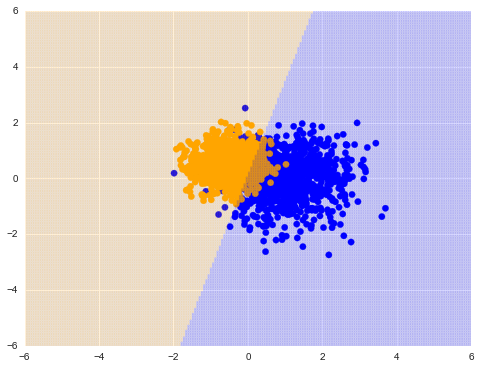

In [1132]:
plotIt(x_train, y_train, x_test, ps)

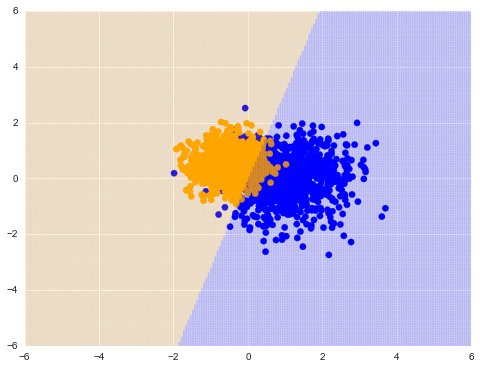

In [1133]:
plotIt(x_train, y_train, x_test, y_train_SGD)

#Scikit Comparison

In [1134]:
from sklearn.linear_model import LogisticRegression

LGSTC = LogisticRegression(solver = "liblinear")
LGSTC.fit(x_train, np.ravel(y_train))
beta_LGSTC = LGSTC.coef_.T
y_testLogistic = LGSTC.predict(x_test)

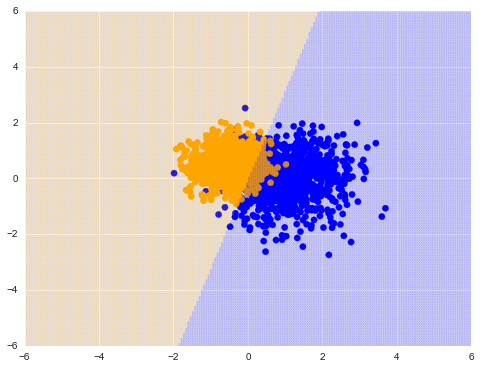

In [1135]:
plotIt(x_train, y_train, x_test, y_testLogistic)